WIN-1-21 Картанбаев Чингиз 

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_linnerud

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import mglearn.datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>1. Набор данных по диабету</h2>

In [3]:
diabetes = load_diabetes()

<h4>Ключи датасета</h4>

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

<h4>Размерность датасета</h4>

In [5]:
print(diabetes.data.shape)

(442, 10)


<h4>Краткое описание</h4>

In [6]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<h4>Список признаков</h4>

In [7]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h4>Первые 10 строк датасета</h4>

In [8]:
print(diabetes['data'][:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581619  0.00306441]


<h4>Разбиение датасета на обучающий и тестовый наборы</h4>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=15)

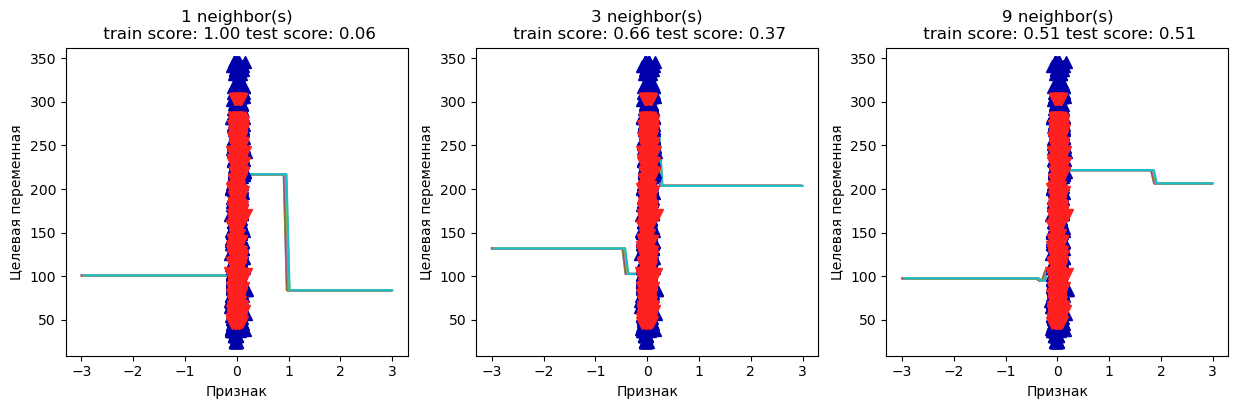

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-10, 10)
for n_neighbors, ax in zip([1, 3, 9], axes):
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")

<h4>Алгоритм регрессии k-ближайших соседей (KNeighborsRegressor)</h4>

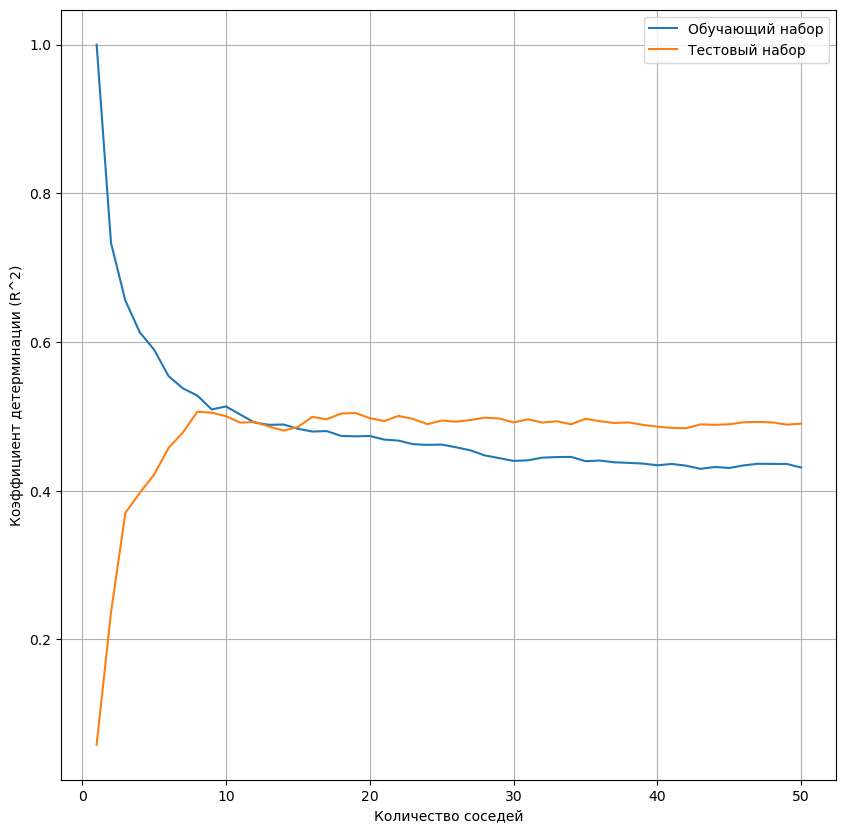

In [39]:
n_neighbors_values = list(range(1, 51))
scores_training = []
scores_testing = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_train, y_train)
    scores_training.append(model.score(X_train, y_train))
    scores_testing.append(model.score(X_test, y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(n_neighbors_values, scores_training, label='Обучающий набор')
plt.plot(n_neighbors_values, scores_testing, label='Тестовый набор')

plt.xlabel('Количество соседей')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()


<h4>Линейная регрессия (LinearRegression)</h4>

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Веса (coef_):\n', model.coef_)
print('\nСдвиг (intercept_): ', model.intercept_)

print('\nКоэффициент детерминации (R^2) для обучающего набора: ', model.score(X_train, y_train))
print('\nКоэффициент детерминации (R^2) для тестового набора: ', model.score(X_test, y_test))

Веса (coef_):
 [  -15.24159882  -223.90734472   537.86276441   306.00990638
 -1215.02495715   655.61775167   386.18392852   376.05655514
   926.72701755    91.21246402]

Сдвиг (intercept_):  150.83081708951661

Коэффициент детерминации (R^2) для обучающего набора:  0.5249444465408164

Коэффициент детерминации (R^2) для тестового набора:  0.46321742172499836


<h4>Ridge регрессия (Ridge)</h4>

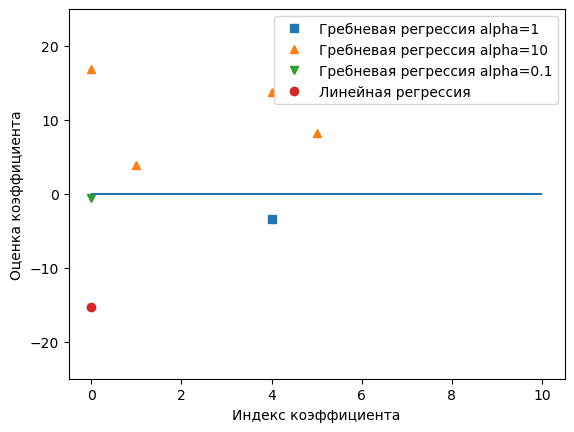

In [13]:
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc='upper right')  
plt.show()

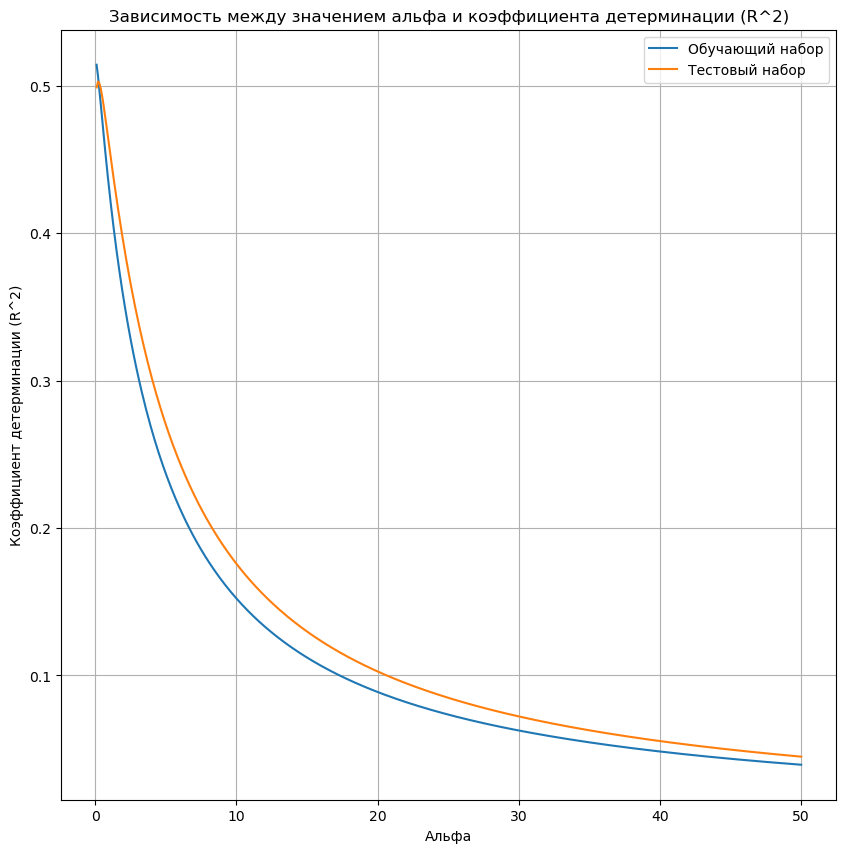

In [14]:
alpha_values = np.arange(0.1, 50.1, 0.1)
scores_training = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_train, y_train)
    
    scores_training.append(model.score(X_train, y_train))

alpha_values = np.arange(0.1, 50.1, 0.1)
scores_testing = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_train, y_train)
    
    scores_testing.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<h4>Lasso регрессия (Lasso)</h4>

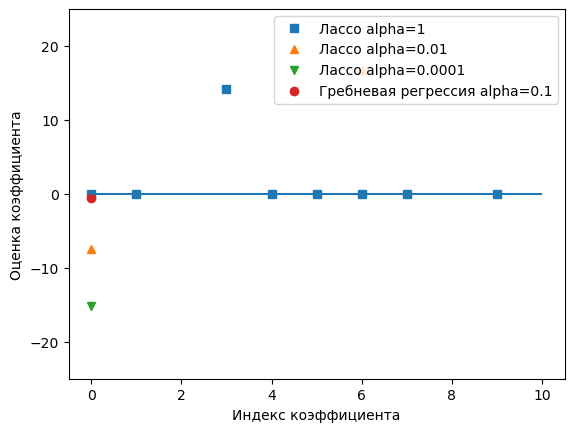

In [15]:
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc='upper right')  
plt.show()

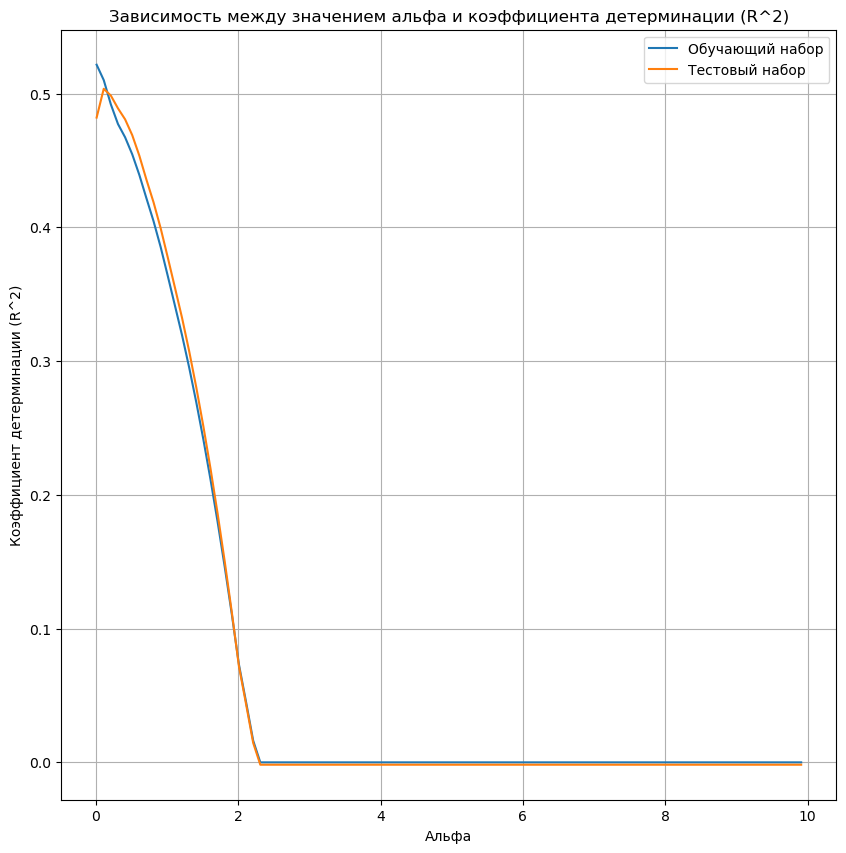

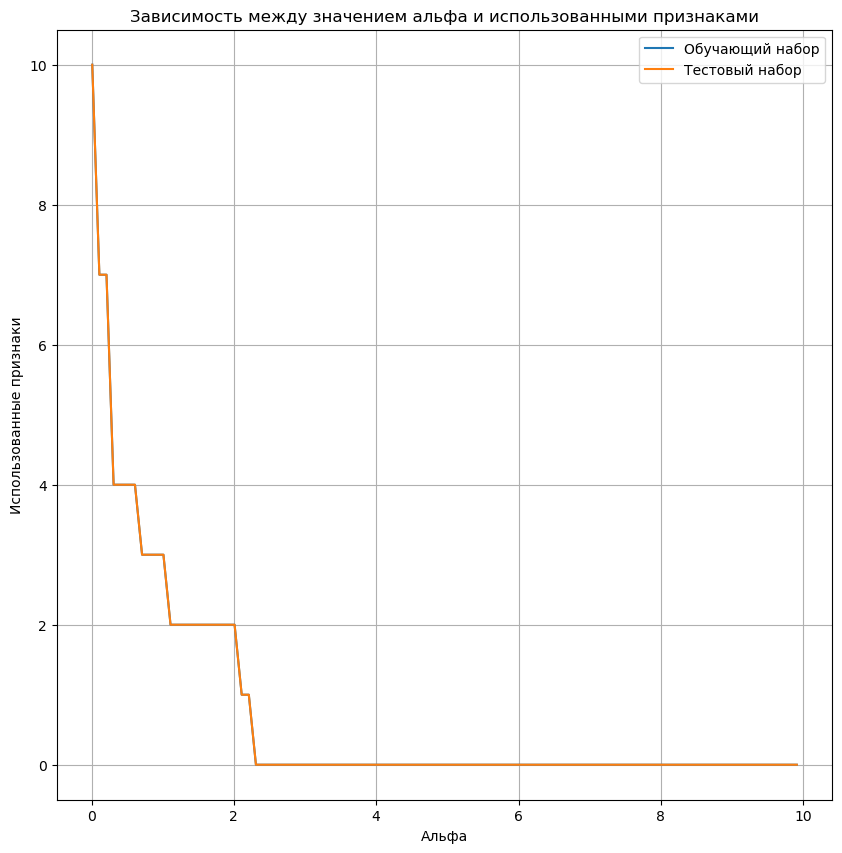

In [16]:
alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_training = []
scores_training = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_train, y_train)
    
    used_features_training.append(np.sum(model.coef_ != 0))
    scores_training.append(model.score(X_train, y_train))

alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_testing = []
scores_testing = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_train, y_train)
    
    used_features_testing.append(np.sum(model.coef_ != 0))
    scores_testing.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, used_features_training, label='Обучающий набор')
plt.plot(alpha_values, used_features_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и использованными признаками')
plt.xlabel('Альфа')
plt.ylabel('Использованные признаки')

plt.grid(True)
plt.legend(loc='best')

plt.show()

Из проведенного анализа данных видно, что различные методы регрессии, включая k-ближайших соседей, линейную регрессию, Ridge регрессию и Lasso регрессию, не показали выдающихся результатов при попытке предсказать значения в наборе данных, описывающем диабетические показатели. Наилучшая точность достигнута с использованием метода k-ближайших 10 соседей, но даже она оказалась всего на уровне 50%.

Обобщая, полученные результаты свидетельствуют о необходимости применения более сложных моделей, которые способны учитывать нелинейные связи и сложные структуры в данных. Также возможно, что для улучшения точности предсказания диабетических показателей потребуется дополнительная предварительная обработка данных или использование других методов машинного обучения, таких как нейронные сети.

<h2>2. Набор данных физических упражнений</h2>

In [17]:
linnerud = load_linnerud()

<h4>Ключи датасета</h4>

In [18]:
linnerud.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])

<h4>Размерность датасета</h4>

In [19]:
print(linnerud.data.shape)

(20, 3)


<h4>Краткое описание</h4>

In [20]:
print(linnerud['DESCR'])

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



<h4>Список признаков</h4>

In [21]:
print(linnerud['feature_names'])

['Chins', 'Situps', 'Jumps']


<h4>Первые 10 строк датасета</h4>

In [22]:
print(linnerud['data'][:10])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]]


<h4>Данные о упражнениях (отжимания, приседания и прыжки.)</h4>

In [23]:
print(linnerud['data'])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


<h4>Физиологические данные (вес, талия и пульс)</h4>

In [24]:
print(linnerud['target'])

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


<h4>Разбиение датасета на обучающий и тестовый наборы</h4>

In [45]:
X_training, X_testing, y_training, y_testing = train_test_split(linnerud['data'], linnerud['target'], random_state=12)

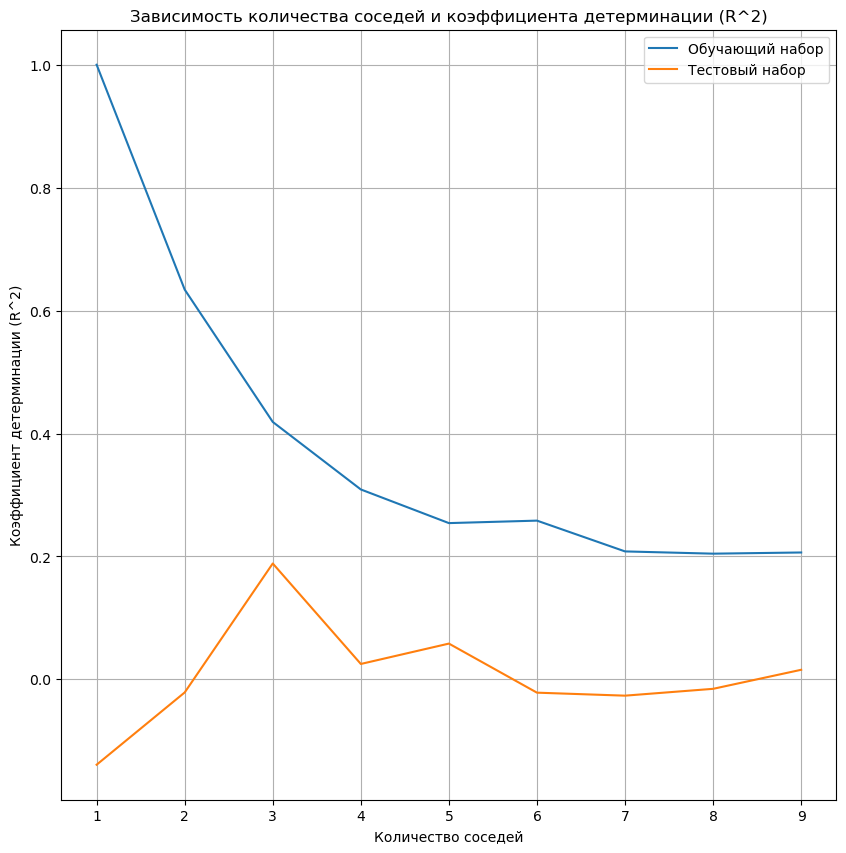

In [46]:
n_neighbors_values = [i for i in range(1, 10)]
scores_training = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_training.append(model.score(X_training, y_training))

n_neighbors_values = [i for i in range(1, 10)]
scores_testing = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(n_neighbors_values, scores_training, label='Обучающий набор')
plt.plot(n_neighbors_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость количества соседей и коэффициента детерминации (R^2)')
plt.xlabel('Количество соседей')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<h4>Линейная регрессия (LinearRegression)</h4>

In [47]:
model = LinearRegression()
model.fit(X_training, y_training)

print('Веса (coef_):\n', model.coef_)
print('\nСдвиг (intercept_): ', model.intercept_)

print('\nКоэффициент детерминации (R^2) для обучающего набора: ', model.score(X_training, y_training))
print('\nКоэффициент детерминации (R^2) для тестового набора: ', model.score(X_testing, y_testing))

Веса (coef_):
 [[-0.99381308 -0.14361965  0.17147116]
 [-0.129926   -0.03579848  0.04316316]
 [ 0.34640513  0.0154107  -0.02030796]]

Сдвиг (intercept_):  [199.3315039   39.07306843  51.48254856]

Коэффициент детерминации (R^2) для обучающего набора:  0.38358729643525447

Коэффициент детерминации (R^2) для тестового набора:  0.08967149081799208


<h4>Ridge регрессия (Ridge)</h4>

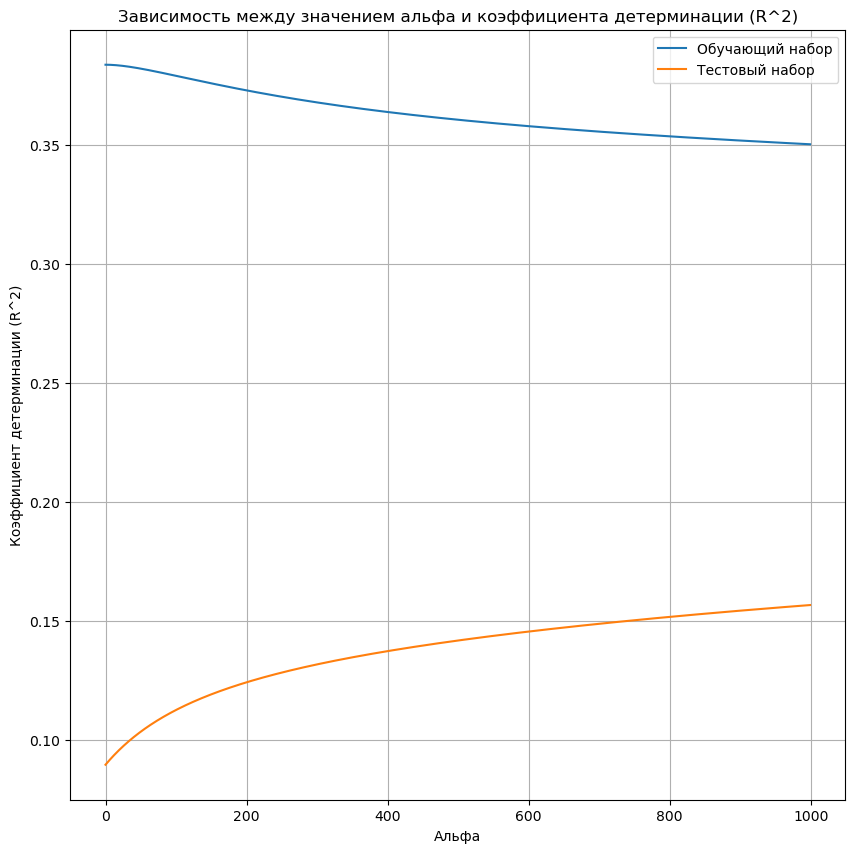

In [48]:
alpha_values = np.arange(0, 1000)
scores_training = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    
    scores_training.append(model.score(X_training, y_training))

alpha_values = np.arange(0, 1000)
scores_testing = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<h4>Lasso регрессия (Lasso)</h4>

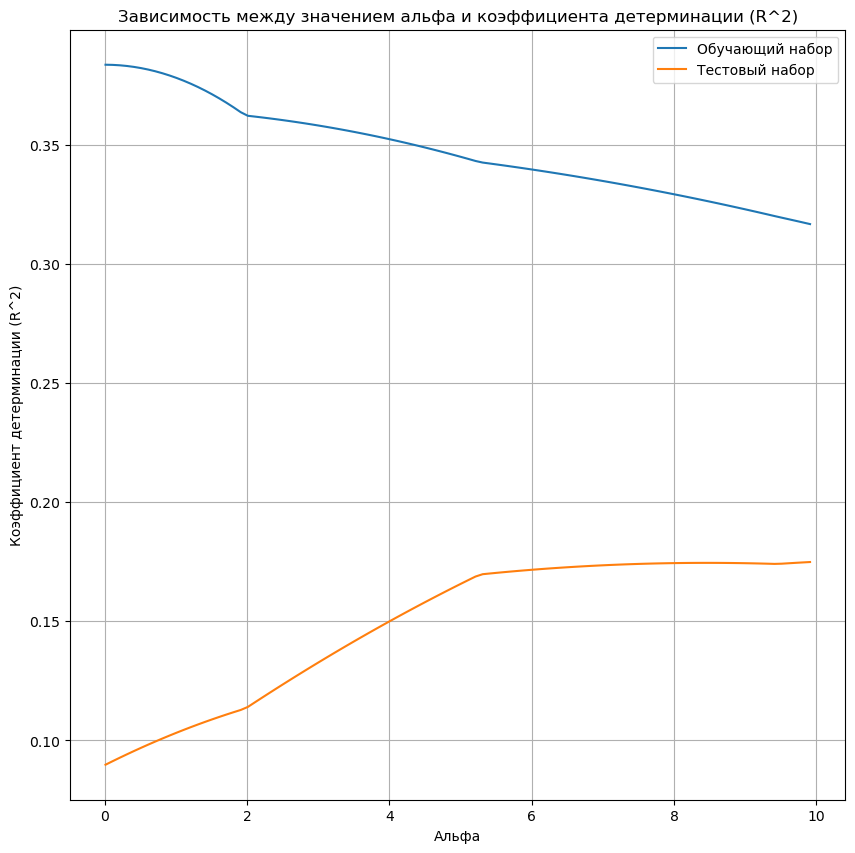

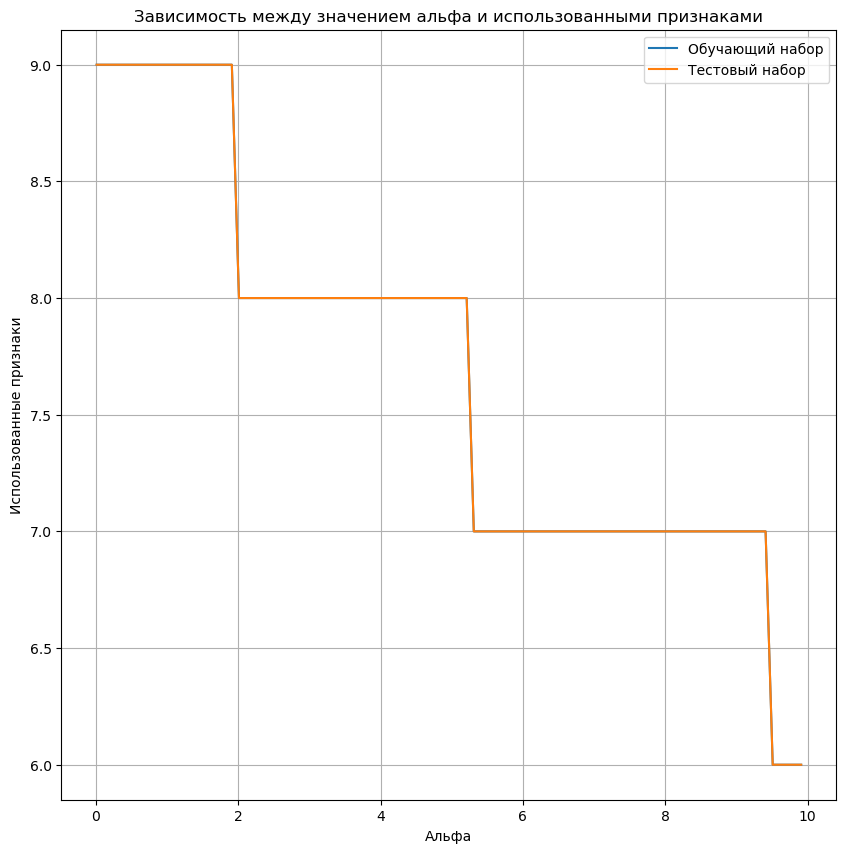

In [49]:
alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_training = []
scores_training = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)
    
    used_features_training.append(np.sum(model.coef_ != 0))
    scores_training.append(model.score(X_training, y_training))

alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_testing = []
scores_testing = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)
    
    used_features_testing.append(np.sum(model.coef_ != 0))
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, used_features_training, label='Обучающий набор')
plt.plot(alpha_values, used_features_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и использованными признаками')
plt.xlabel('Альфа')
plt.ylabel('Использованные признаки')

plt.grid(True)
plt.legend(loc='best')

plt.show()

Результаты алгоритма демонстрируют крайне низкую эффективность, вероятно, из-за ограниченного объема обучающих данных, всего 20 экземпляров. Недостаточное количество информации в датасете также сказывается на модели, которая не способна предсказать результаты с высокой точностью. В итоге, эффективность модели очень мала.